In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("global_cancer_patients_2015_2024.csv")


In [ ]:
data

In [ ]:
data.info()

In [ ]:
data.duplicated().sum()

#  Descriptive analysis

In [ ]:
# plotting for age column
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Age"], fill=True, color="lightgreen")
plt.title("KDE plot for Age")

plt.subplot(1,2,2)
sns.histplot(data["Age"], bins=30,  kde=False, color="cyan")
plt.title("Histogram plot for Age")

plt.tight_layout()
plt.show()

In [ ]:
data["Age"].describe()

In [ ]:
# Gender column
data["Gender"].value_counts()

sns.barplot(x= data["Gender"].value_counts().index,
            y= data["Gender"].value_counts().values,
            palette=["blue", "pink", "green"]
           )
for i , v in enumerate(data["Gender"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Gender count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [ ]:
data["Gender"].value_counts()

In [ ]:
# countries column

country_counts= data["Country_Region"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(x=country_counts.values, 
        labels=country_counts.index,
        autopct= '%1.1f%%'
       )

plt.title("Country/Region Distribution")
plt.show()

In [ ]:
# cancer type 
data["Cancer_Type"].value_counts()

sns.barplot(x=data["Cancer_Type"].value_counts().index,
            y=data["Cancer_Type"].value_counts().values)

for i , v  in enumerate(data["Cancer_Type"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Cancer type count")
plt.xlabel("Cancer type")
plt.ylabel("Count")
plt.show()

In [ ]:
# Cancer Stage
data["Cancer_Stage"].value_counts()

sns.barplot(x=data["Cancer_Stage"].value_counts().index,
            y=data["Cancer_Stage"].value_counts().values)

for i , v  in enumerate(data["Cancer_Stage"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Cancer Stage count")
plt.xlabel("Cancer type")
plt.ylabel("Count")
plt.show()

In [ ]:
data.info()

In [ ]:
# plotting for treatment cost

# plotting for age column
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Treatment_Cost_USD"], fill=True, color="lightgreen")
plt.title("KDE plot for Age")

plt.subplot(1,2,2)
sns.histplot(data["Treatment_Cost_USD"], bins=30,  kde=False, color="cyan")
plt.title("Histogram plot for Age")

plt.tight_layout()
plt.show()

In [ ]:
data["Treatment_Cost_USD"].describe()

In [ ]:
# ANALYLIZING THE RISK FACTORS
column_of_interest= ['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

summary= data[column_of_interest].agg(['mean', "std", "min", "max"])
summary

# Determine the relationship between risk factors and cancer severity

In [ ]:
from scipy.stats import linregress

risk_factors= ['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
titles= ['Genetic Risk','Air Pollution', 'Alcohol Use', 'Smoking', 'Obesity Level']
colors= ["blue", "green", "orange", "red", "purple"]

plt.figure(figsize=(20,12))
for i , (factor , title,color) in enumerate(zip(risk_factors, titles, colors),1):
    plt.subplot(2,3,i)
    
    x=data[factor]
    y=data["Target_Severity_Score"]
    slope, intercept , r_value , p_value , std_err= linregress(x,y)
    r_squared= r_value**2

    sns.lineplot(x=factor, y="Target_Severity_Score", data=data, color=color)
    plt.plot(x,x*slope+intercept, color="black", linewidth=2, label="Regression Line")
    plt.title(f"{title} vs Severity Score\n R2= {r_squared},Slope= {slope}")
    plt.xlabel(factor)
    plt.ylabel("Target Severity Score")
    plt.legend()

#line= y=mx+c

plt.tight_layout()
plt.show()
    
    

# Analyze the proportion of early-stage diagnoses by cancer type

In [17]:
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [18]:
#tHIS IS FOR LUNG CANCER 
stage_count= data[data["Cancer_Type"]=="Lung"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of lungs cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of lungs cancer  diagnosed  at stage 0 and Stag 1 : 38.43156356551388


In [19]:
#THIS OS FOR LEUKEMIA CANCER
stage_count= data[data["Cancer_Type"]=="Leukemia"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Leukemia cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Leukemia cancer  diagnosed  at stage 0 and Stag 1 : 39.53080114905841


In [22]:
#THIS IS FOR BREAST CANCER
stage_count= data[data["Cancer_Type"]=="Breast"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Breast cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Breast cancer  diagnosed  at stage 0 and Stag 1 : 39.47325900791727


In [20]:
# Calculating proportion of COLON cancer diagnosed at early stages (Stage 0 and Stage I)
stage_count= data[data["Cancer_Type"]=="Colon"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : 40.41718946047679


In [21]:
# Calculating proportion of SKIN cancer diagnosed at early stages (Stage 0 and Stage I)
stage_count= data[data["Cancer_Type"]=="Skin"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : 40.41084898090194


In [23]:
stage_count= data[data["Cancer_Type"]=="Cervical"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Cervical cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Cervical cancer  diagnosed  at stage 0 and Stag 1 : 39.85856637737062


In [24]:
stage_count= data[data["Cancer_Type"]=="Prostate"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Prostate cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Prostate cancer  diagnosed  at stage 0 and Stag 1 : 40.187064045656314


In [25]:
stage_count= data[data["Cancer_Type"]=="Liver"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Liver cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Liver cancer  diagnosed  at stage 0 and Stag 1 : 40.614498319731155


# Identify key predictors of cancer severity and survival years.

In [26]:
features= ["Age", 'Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

targets= ["Survival_Years","Target_Severity_Score"]

#calculate correlations
pearson_corr= data[features+targets].corr(method="pearson")
spearman_corr= data[features+targets].corr(method="spearman")

# slice out only thr relationship with target variables
pearson_results= pearson_corr[targets]
spearman_results=spearman_corr[targets]

#combine both
correlation_df= pd.concat([pearson_results,spearman_results], axis=1, keys=["Pearson","Spearman"])
correlation_df

Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

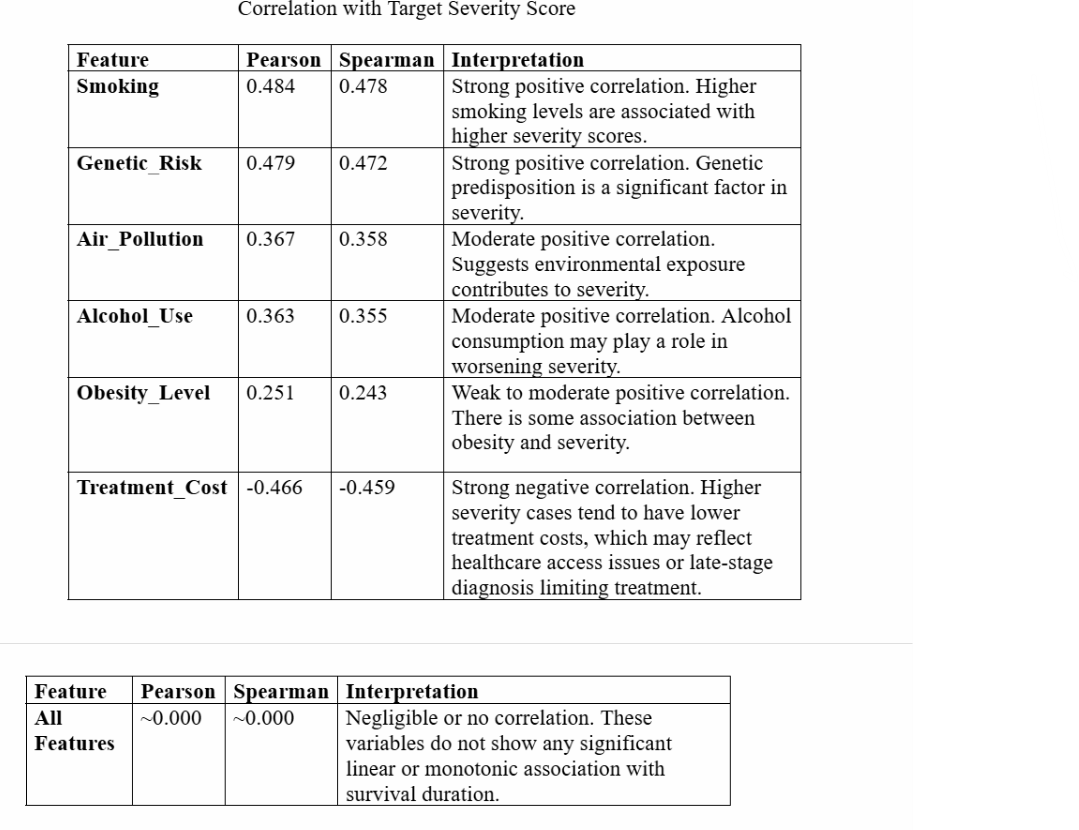

In [27]:
# random forest for target severity score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# caonveting categorical columns to numerical columns
categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le= LabelEncoder()
    data[col]=le.fit_transform(data[col])

# Preparing  features and input
X= data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity= data["Target_Severity_Score"]

# train test split
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)

# train the model
model= RandomForestRegressor(n_estimators=200, max_depth= None , min_samples_split=2,min_samples_leaf=1, random_state=40)
model.fit(X_train_s, y_train_s)

# evalaute the model
train_r2_severity= r2_score(y_train_s , model.predict(X_train_s))
test_r2_severity= r2_score(y_test_s , model.predict(X_test_s))


In [28]:
print(train_r2_severity)
print(test_r2_severity)

0.9689503792116058
0.7752278237418935


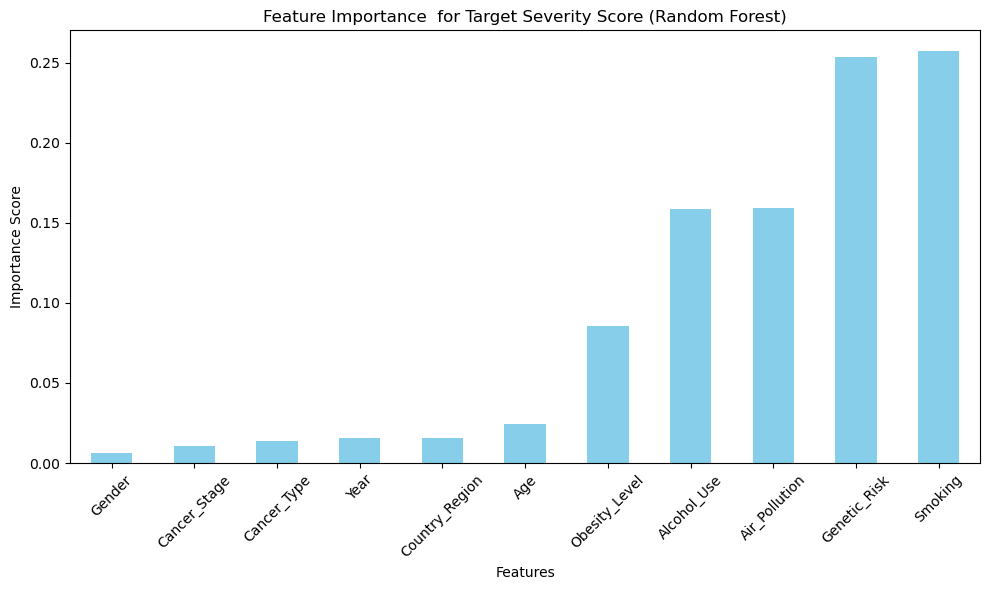

In [29]:
feature_importance_severity= pd.Series(model.feature_importances_, index=X.columns,).sort_values(ascending=True)

#plotting of important features
plt.figure(figsize=(10,6))
feature_importance_severity.plot(kind="bar", color="skyblue")
plt.title("Feature Importance  for Target Severity Score (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

In [31]:
# random forest for target severity score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# caonveting categorical columns to numerical columns
categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le= LabelEncoder()
    data[col]=le.fit_transform(data[col])

# Preparing  features and input
X= data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity= data["Survival_Years"]

# train test split
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# train the model
model= RandomForestRegressor(random_state=40)
GSC= GridSearchCV(model , param_grid, cv=3, scoring="r2", n_jobs=-1)
GSC.fit(X_train_s, y_train_s)

best_rf_severity= GSC.best_estimator_

# evalaute the model
train_r2_severity= r2_score(y_train_s , best_rf_severity.predict(X_train_s))
test_r2_severity= r2_score(y_test_s , best_rf_severity.predict(X_test_s))

In [32]:
print(train_r2_severity)
print(test_r2_severity)

0.008998065861791305
-0.0003487352301705382


<Axes: xlabel='Survival_Years', ylabel='Count'>

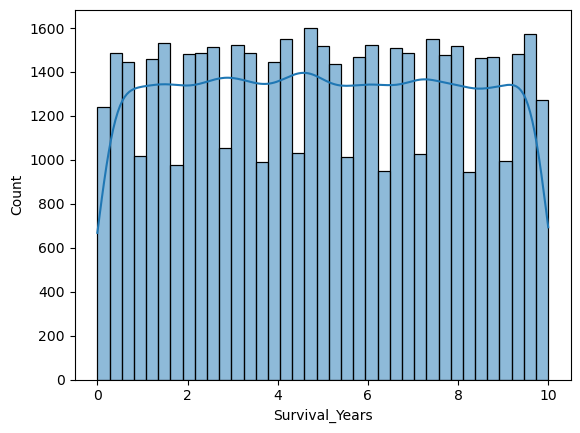

In [33]:
import seaborn as sns
sns.histplot(data["Survival_Years"], kde=True)

In [34]:
data.corr(numeric_only=True)["Survival_Years"].sort_values(ascending=True)

Gender                  -0.007121
Cancer_Stage            -0.003014
Cancer_Type             -0.001717
Alcohol_Use             -0.000527
Treatment_Cost_USD      -0.000429
Age                     -0.000147
Year                     0.000018
Air_Pollution            0.000893
Smoking                  0.001371
Genetic_Risk             0.001708
Target_Severity_Score    0.004161
Country_Region           0.005121
Obesity_Level            0.009771
Survival_Years           1.000000
Name: Survival_Years, dtype: float64

# Explore the economic burden of cancer treatment across different demographics and countries

In [ ]:
data = pd.read_csv("global_cancer_patients_2015_2024.csv")
data

In [ ]:
data["Age_Group"]=pd.cut(data["Age"],bins=[0,30,45,60,75,100],labels=["0-30","31-45","46-60","61-75","76+"])

In [ ]:
country_age_cost= data.groupby(["Country_Region", "Age_Group","Gender"])["Treatment_Cost_USD"].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=country_age_cost,x="Country_Region", y="Treatment_Cost_USD", hue="Gender") 
plt.title("Average cancer treatment  cost  by country  and gender")
plt.show()

In [ ]:
country_age_cost= data.groupby(["Country_Region", "Age_Group"])["Treatment_Cost_USD"].mean().reset_index()

In [ ]:
heatmap_data= country_age_cost.pivot(index="Age_Group", columns="Country_Region", values="Treatment_Cost_USD")

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f")
plt.title("Average Treatment  cost by Age Group and  Country")
plt.show()

# Assess whether higher treatment cost is associated with longer survival

In [ ]:
from scipy.stats  import pearsonr, spearmanr
x= data["Treatment_Cost_USD"]
y=data["Survival_Years"]

# performing pearson correlation test
pearson_corr, pearson_p = pearsonr(x,y)
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Pearson P-Value : {pearson_p}")

# Spearman correlation test
spearman_corr, spearman_p = spearmanr(x,y)
print(f"spearman Correlation Coefficient: {spearman_corr}")
print(f"spearman P-Value : {spearman_p}")

alpha=0.05

def interpret_corr(corr, p, method):
    if p<alpha:
        print(f"{method}, we  reject thr hull hypothesis")
    else:
        print(f"{method}, we failed to reject null hypothesis")

interpret_corr(pearson_corr,pearson_p,"Pearson")
interpret_corr(spearman_corr,spearman_p,"Spearman")

In [ ]:
sns.regplot(x=x, y=y, line_kws={"color":"red"})
plt.show()

# Evaluate if higher cancer stages lead to greater treatment costs and reduced survival years

In [ ]:
df= data.copy()

In [ ]:
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']

In [ ]:
grouped_stats= df.groupby("Cancer_Stage")[["Treatment_Cost_USD","Survival_Years"]].mean().reset_index()

In [ ]:
grouped_stats

In [ ]:
grouped_costs=[]
grouped_survival=[]


for  stage in stage_order:
    stage_data= df[df["Cancer_Stage"]==stage]
    cost= stage_data["Treatment_Cost_USD"]
    survival= stage_data["Survival_Years"]
    grouped_costs.append(cost)
    grouped_survival.append(survival)
    

In [ ]:
len(grouped_costs)

In [ ]:
# check for normaility
from scipy.stats import  shapiro, f_oneway
normal_cost=0
normal_survival=0

for i in range (len(stage_order)):
    cost_p= shapiro(grouped_costs[i]).pvalue
    surv_p= shapiro(grouped_survival[i]).pvalue 
    print(f" cost {cost_p} for group {i}")
    print(f"Survival {surv_p} for group {i}")
    if cost_p<0.05:
        normal_cost+=1
    if surv_p<0.05:
        normal_survival+=1



In [ ]:
print(normal_cost)
print(normal_survival)

In [ ]:
from scipy.stats import kruskal

In [ ]:
kusrkal_cost =kruskal(*grouped_costs)
kurkal_survival= kruskal(*grouped_survival)

p_cost= kusrkal_cost.pvalue
p_survival= kurkal_survival.pvalue


In [ ]:
p_cost

In [ ]:
p_survival

# Examine whether higher genetic risk amplifies the negative effects of smoking on cancer severity 

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols("Target_Severity_Score ~ Genetic_Risk*Smoking", data=data).fit()

model.summary2().tables[1].loc["Genetic_Risk:Smoking"]

In [ ]:
p_value=0.628255